In [1]:
from NeuralNetwork import * 

In [2]:
def SpiralData(points, classes):
    X = np.zeros((points * classes, 2))
    Y = np.zeros(points * classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number +1))
        r = np.linspace(0.01, 1, points)
        t =np.linspace(class_number * 4 , (class_number + 1) * 4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        Y[ix] = class_number
    return X, Y 

In [3]:
def Model(XTrain, YTrain):
        Layer1 = DenseLayer(n_inputs=2, n_neurons=3)
        relu = ReLU()
        Layer2 = DenseLayer(n_inputs=3, n_neurons=3)
        softmax = Softmax()
        LossFunction = Activation_Softmax_Loss_CategoricalCrossentropy()

        Layer1.forward(inputs=XTrain)
        relu.forward(inputs=Layer1.output)
        Layer2.forward(inputs=relu.output)
        loss = LossFunction.forward(Layer2.output, YTrain)
       
        LossFunction.backward(LossFunction.output, YTrain)
        Layer2.backward(LossFunction.dinputs)
        relu.backward(Layer2.dinputs)
        Layer1.backward(relu.dinputs)

        return Layer1, Layer2, loss, LossFunction


BestLoss = 1000000
BestAcc = 0
Layer1BestWeight = 0
Layer1BestBias = 0
Layer2BestWeight = 0
Layer2BestBias = 0

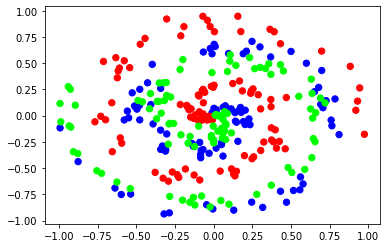

In [4]:
import matplotlib.pyplot as plt
x, y = SpiralData(100, 3)
plt.scatter(x[:, 0 ], x[:, 1 ], c = y, s = 40 , cmap = 'brg' )
plt.show()

In [5]:
epochs = 1000
for i in range(epochs):

    Layer1, Layer2, loss, LossFunction = Model(x, y)
    
    predictions = np.argmax(LossFunction.output, axis=1)
    acc = np.mean(predictions == y)

    if acc > BestAcc:
        BestAcc = acc
    if loss < BestLoss:
        Layer1BestWeight = Layer1.weights.copy()
        Layer1BestBias = Layer1.biases.copy()
        Layer2BestWeight = Layer2.weights.copy()
        Layer2BestBias = Layer2.biases.copy()
        BestLoss = loss
    else:
        Layer1.weights = Layer1BestWeight.copy()
        Layer1.biases = Layer1BestBias.copy()
        Layer2.weights = Layer2BestWeight.copy()
        Layer2.biases = Layer2BestBias.copy()

print('Spiral Data: ')
print('Best Loss', BestLoss)
print('Best Accuracy', BestAcc)

Spiral Data: 
Best Loss 1.0984218534191574
Best Accuracy 0.4


In [6]:
def VerticalData(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
    return X, y

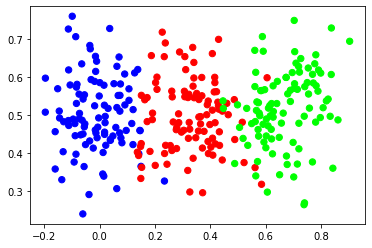

In [7]:
import matplotlib.pyplot as plt
X, Y = VerticalData(100, 3)
plt.scatter(X[:, 0 ], X[:, 1 ], c = Y, s = 40 , cmap = 'brg' )
plt.show()

In [8]:
epochs = 1000
for i in range(epochs):

    Layer1, Layer2, loss, LossFunction = Model(X, Y)
    
    predictions = np.argmax(LossFunction.output, axis=1)
    acc = np.mean(predictions == Y)

    if acc > BestAcc:
        BestAcc = acc
    if loss < BestLoss:
        Layer1BestWeight = Layer1.weights.copy()
        Layer1BestBias = Layer1.biases.copy()
        Layer2BestWeight = Layer2.weights.copy()
        Layer2BestBias = Layer2.biases.copy()
        BestLoss = loss
    else:
        Layer1.weights = Layer1BestWeight.copy()
        Layer1.biases = Layer1BestBias.copy()
        Layer2.weights = Layer2BestWeight.copy()
        Layer2.biases = Layer2BestBias.copy()

print('Vertical Data: ')
print('Best Loss', BestLoss)
print('Best Accuracy', BestAcc)

Vertical Data: 
Best Loss 1.0969349230678624
Best Accuracy 0.6633333333333333
